In [25]:
# modules we'll use
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set seed for reproducibility
np.random.seed(0)


In [26]:
test_data_datapath='/content/Test.csv'
train_data_datapath='/content/Train.csv'

#read in all data in both test & train data
test_data=pd.read_csv(test_data_datapath)
train_data=pd.read_csv(train_data_datapath)

In [27]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [28]:
#fill the missing values in item_weight column with the mean in both datas
meanitem_weight=np.mean(train_data.Item_Weight)
train_data.Item_Weight=train_data.Item_Weight.fillna(meanitem_weight)

meanitem_weight=np.mean(test_data.Item_Weight)
test_data.Item_Weight=test_data.Item_Weight.fillna(meanitem_weight)

#checking
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [29]:
#checking to know the mode in Outlet_Size column
print(test_data.Outlet_Size.describe())
print(train_data.Outlet_Size.describe())

count       4075
unique         3
top       Medium
freq        1862
Name: Outlet_Size, dtype: object
count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object


In [30]:
#replacing the missing values with the mode in Outlet_Size column
test_data.Outlet_Size.fillna('Medium', inplace=True)
train_data.Outlet_Size.fillna('Medium', inplace=True)

#checking
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


<Axes: >

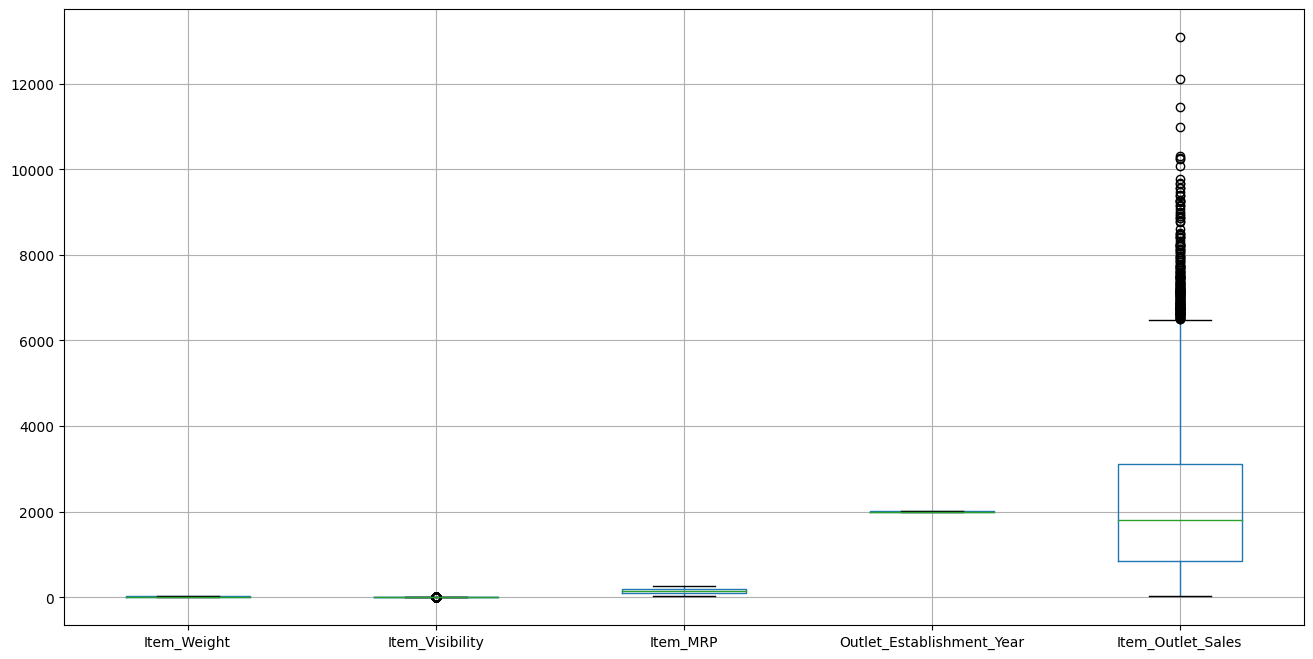

In [31]:
plt.figure(figsize=(16,8))
train_data.boxplot()

<Axes: >

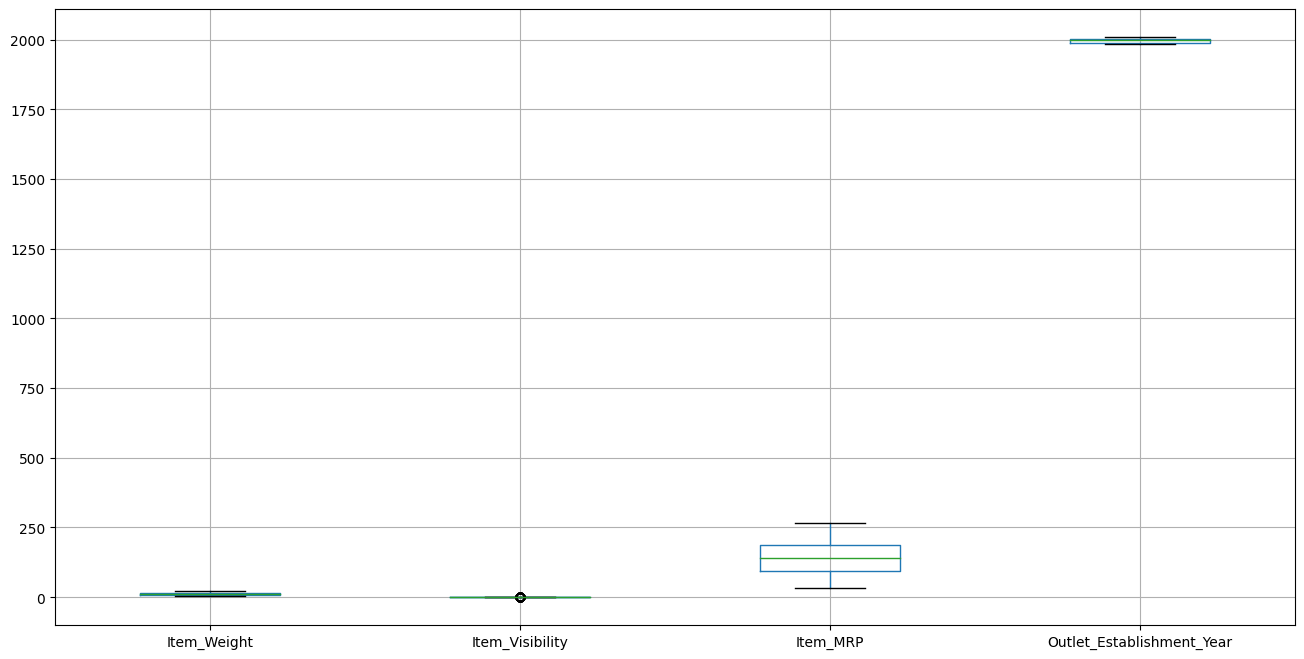

In [32]:
plt.figure(figsize=(16,8))
test_data.boxplot()

In [33]:
#removing outliers in Item_Visibility and Item_Outlet_Sales have outliers in data
sorted(train_data['Item_Visibility'])
Q1,Q3=train_data['Item_Visibility'].quantile([0.25,0.75])
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

train_data.Item_Visibility=np.where(train_data.Item_Visibility>upper_range,upper_range,train_data.Item_Visibility)
train_data.Item_Visibility=np.where(train_data.Item_Visibility<lower_range,lower_range,train_data.Item_Visibility)

In [34]:
sorted(train_data['Item_Outlet_Sales'])
Q1,Q3=train_data['Item_Outlet_Sales'].quantile([0.25,0.75])
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

train_data.Item_Outlet_Sales=np.where(train_data.Item_Outlet_Sales>upper_range,upper_range,train_data.Item_Outlet_Sales)
train_data.Item_Outlet_Sales=np.where(train_data.Item_Outlet_Sales<lower_range,lower_range,train_data.Item_Outlet_Sales)

In [35]:
#removing outliers in Item_Visibility have outliers in X_test
sorted(test_data['Item_Visibility'])
Q1,Q3=test_data['Item_Visibility'].quantile([0.25,0.75])
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

test_data.Item_Visibility=np.where(test_data.Item_Visibility>upper_range,upper_range,test_data.Item_Visibility)
test_data.Item_Visibility=np.where(test_data.Item_Visibility<lower_range,lower_range,test_data.Item_Visibility)

<Axes: >

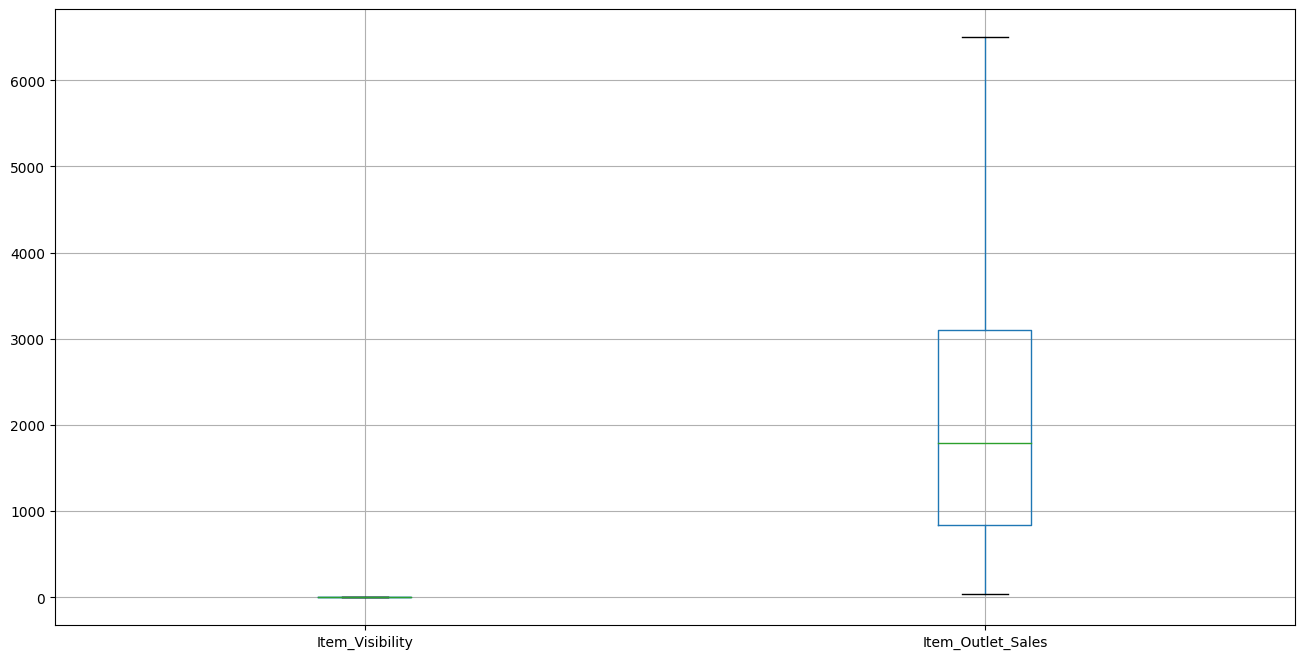

In [36]:
plt.figure(figsize=(16,8))
cols_3=['Item_Visibility', 'Item_Outlet_Sales']
train_data.boxplot(column=cols_3)

<Axes: >

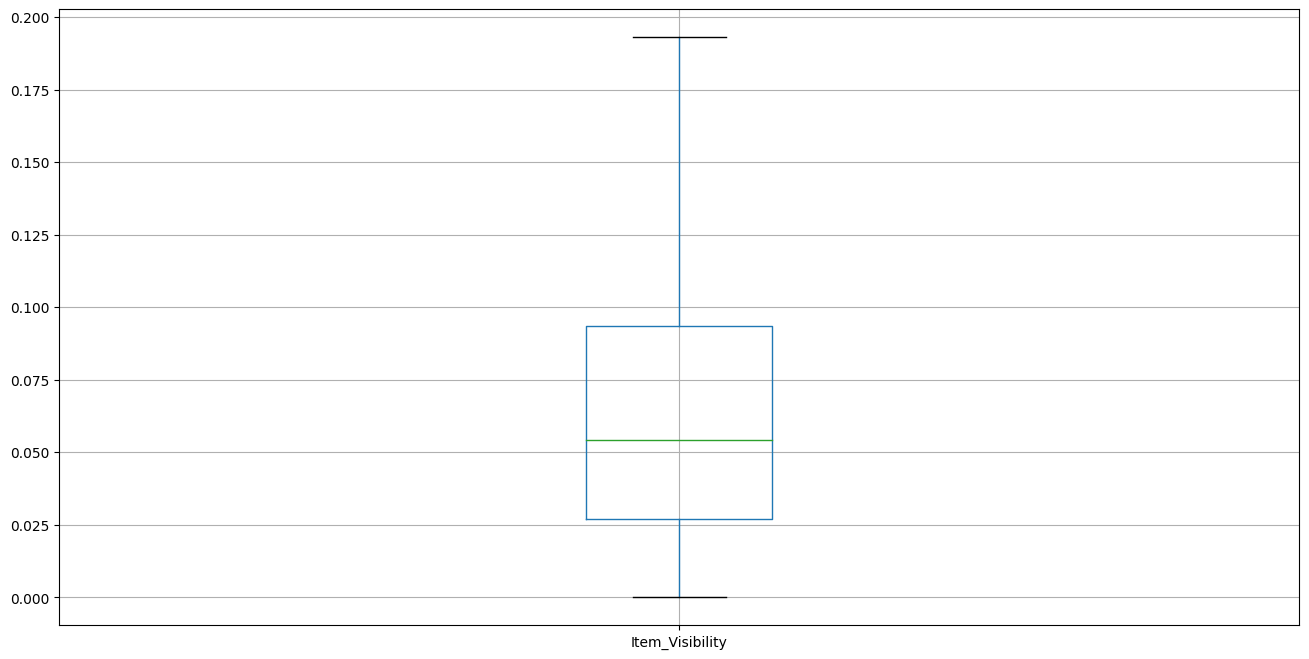

In [37]:
plt.figure(figsize=(16,8))
test_data.boxplot(column='Item_Visibility')

In [38]:
#text pre-processing
Fat_Content=train_data['Item_Fat_Content'].unique()
Fat_Content.sort()
Fat_Content

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [39]:
!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

In [40]:
matches = fuzzywuzzy.process.extract("Low Fat", Fat_Content, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches


[('Low Fat', 100), ('low fat', 100), ('LF', 22), ('Regular', 14), ('reg', 0)]

In [41]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 21):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("All done!")

In [42]:
replace_matches_in_column( df=train_data, column='Item_Fat_Content', string_to_match="Low Fat")
Fat_Content=train_data['Item_Fat_Content'].unique()
Fat_Content.sort()
Fat_Content


All done!


array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [43]:
matches = fuzzywuzzy.process.extract("Regular", Fat_Content, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Regular', 100), ('reg', 60), ('Low Fat', 14)]

In [44]:
replace_matches_in_column( df=train_data, column='Item_Fat_Content', string_to_match="Regular")
Fat_Content=train_data['Item_Fat_Content'].unique()
Fat_Content.sort()
Fat_Content


All done!


array(['Low Fat', 'Regular'], dtype=object)

In [45]:
Item_Type =train_data['Item_Type'].unique()
Item_Type.sort()
Item_Type

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [46]:
Outlet_Size =train_data['Outlet_Size'].unique()
Outlet_Size.sort()
Outlet_Size

array(['High', 'Medium', 'Small'], dtype=object)

In [47]:
Outlet_Location_Type =train_data['Outlet_Location_Type'].unique()
Outlet_Location_Type.sort()
Outlet_Location_Type

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [48]:
Outlet_Type =train_data['Outlet_Type'].unique()
Outlet_Type.sort()
Outlet_Type

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [49]:
replace_matches_in_column( df=test_data, column='Item_Fat_Content', string_to_match="Low Fat")
Fat_Content=test_data['Item_Fat_Content'].unique()
replace_matches_in_column( df=test_data, column='Item_Fat_Content', string_to_match="Regular")
Fat_Content=test_data['Item_Fat_Content'].unique()
Fat_Content.sort()

All done!
All done!


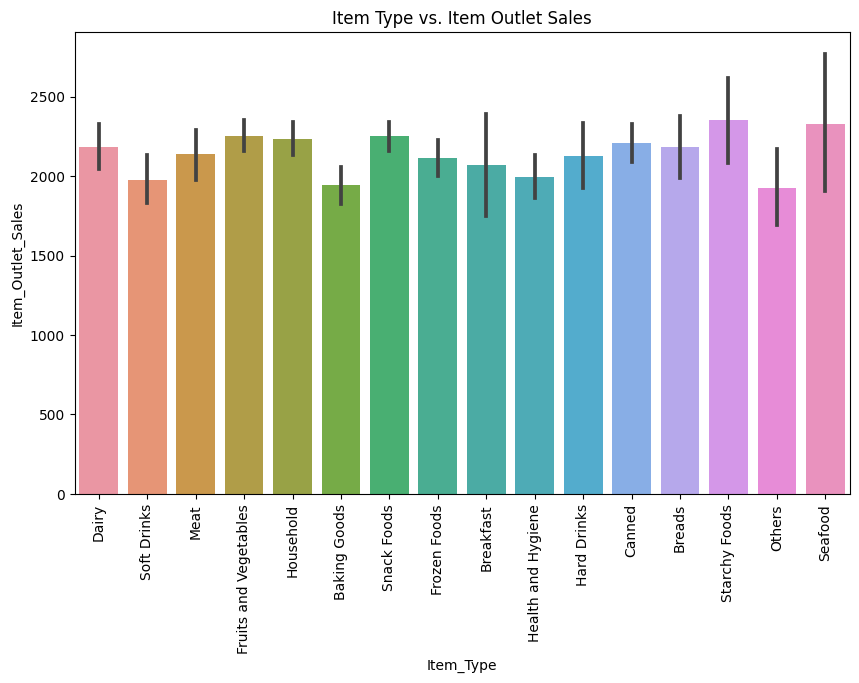

In [50]:
#Data Visualization
# Create a bar chart of Item Type vs. Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data)
plt.xticks(rotation=90)
plt.title('Item Type vs. Item Outlet Sales')
plt.show()

In [51]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cols_1 = ['Item_Fat_Content', 'Outlet_Type','Outlet_Size', 'Outlet_Location_Type']
train_data[cols_1] = ordinal_encoder.fit_transform(train_data[cols_1])


In [52]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cols_1 = ['Item_Fat_Content', 'Outlet_Type','Outlet_Size', 'Outlet_Location_Type']
test_data[cols_1] = ordinal_encoder.fit_transform(test_data[cols_1])

In [53]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
cols = ['Item_Type', 'Outlet_Identifier']

# Create a OneHotEncoder object and fit it to the training data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_encoder.fit(train_data[cols])

# Transform the 'Item_Type' and 'Outlet_Identifier' columns into one-hot encoded columns
OH_cols_train = pd.DataFrame(OH_encoder.transform(train_data[cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_data[cols]))

# Get the feature names for the one-hot encoded columns
feature_names = OH_encoder.get_feature_names_out(cols)

# Rename the one-hot encoded columns
OH_cols_train.columns = feature_names
OH_cols_test.columns = feature_names

# Drop the original 'Item_Type' and 'Outlet_Identifier' columns
train_data = train_data.drop(cols, axis=1)
test_data = test_data.drop(cols, axis=1)

# Concatenate the one-hot encoded columns with the training and test data
train_data = pd.concat([OH_cols_train, train_data], axis=1)
test_data = pd.concat([OH_cols_test, test_data], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
#creating the model
from xgboost import XGBRegressor

y=train_data.Item_Outlet_Sales
X=train_data.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Establishment_Year'], axis=1)

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

import xgboost as xgb

dtrain = xgb.DMatrix(train_X, label=train_y, enable_categorical=True)

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_X, train_y,
             early_stopping_rounds=5,
             eval_set=[(val_X, val_y)],
             verbose=False)

#make predictions
val_predictions = my_model.predict(val_X)

print("The predictions are")
print(my_model.predict(X))


from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y, val_predictions))


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


The predictions are
[4226.461    665.44324 2190.7285  ... 1370.69    1434.5469  1141.712  ]
739.8279851343965


In [55]:
# Make predictions on the new data using the trained XGBoost model
X2=test_data.drop(['Item_Identifier','Outlet_Establishment_Year'], axis=1)
y_pred = my_model.predict(X2)

print(my_model.predict(X2))

pd.Series(y_pred)

[1572.5364 1325.1516  743.5542 ... 1788.4233 3563.1116 1175.8219]


0       1572.536377
1       1325.151611
2        743.554199
3       2354.493164
4       5103.290039
           ...     
5676    2088.199707
5677    2689.410645
5678    1788.423340
5679    3563.111572
5680    1175.821899
Length: 5681, dtype: float32

In [56]:
'''
SUMMARY

i chose XGBoost model because of several advantages such as Scalability , Speed , Regularization and Handling missing values.. etc

some ideas for future work that could enhance my XGBoost model:

1) Feature engineering: I could explore new features or transform existing features to improve the performance of my model.
2) Hyperparameter tuning: I could further optimize the hyperparameters of my XGBoost model to improve its performance.
3) Ensemble methods: I could explore using ensemble methods such as stacking or boosting to combine multiple XGBoost models and improve the overall performance of your model.
4)Exploring other machine learning algorithms: While XGBoost is a powerful algorithm, it's always a good idea to explore other machine learning algorithms to see if they might perform better on my dataset.
'''

"\nSUMMARY\n\ni chose XGBoost model because of several advantages such as Scalability , Speed , Regularization and Handling missing values.. etc\n\nsome ideas for future work that could enhance my XGBoost model:\n\n1) Feature engineering: I could explore new features or transform existing features to improve the performance of my model.\n2) Hyperparameter tuning: I could further optimize the hyperparameters of my XGBoost model to improve its performance.\n3) Ensemble methods: I could explore using ensemble methods such as stacking or boosting to combine multiple XGBoost models and improve the overall performance of your model.\n4)Exploring other machine learning algorithms: While XGBoost is a powerful algorithm, it's always a good idea to explore other machine learning algorithms to see if they might perform better on my dataset. \n"